In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import scipy.stats as stats

plt.close('all')
sns.set_theme(style="ticks")

tips = sns.load_dataset("tips")
print(tips)
print(tips.describe())


     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.00000

KstestResult(statistic=0.9989297061453211, pvalue=7.375539031800851e-259)


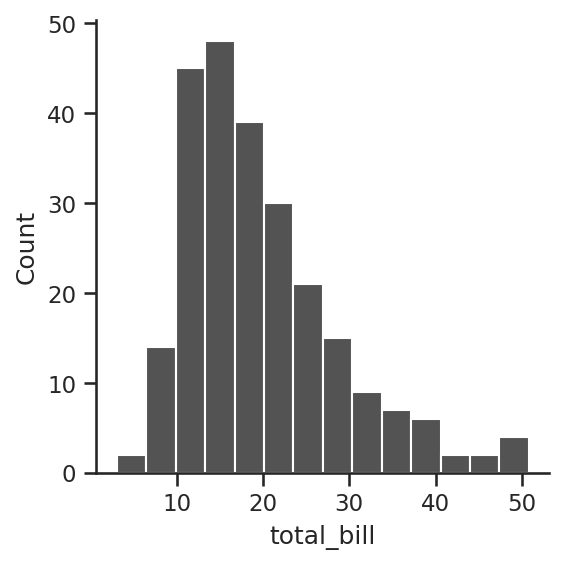

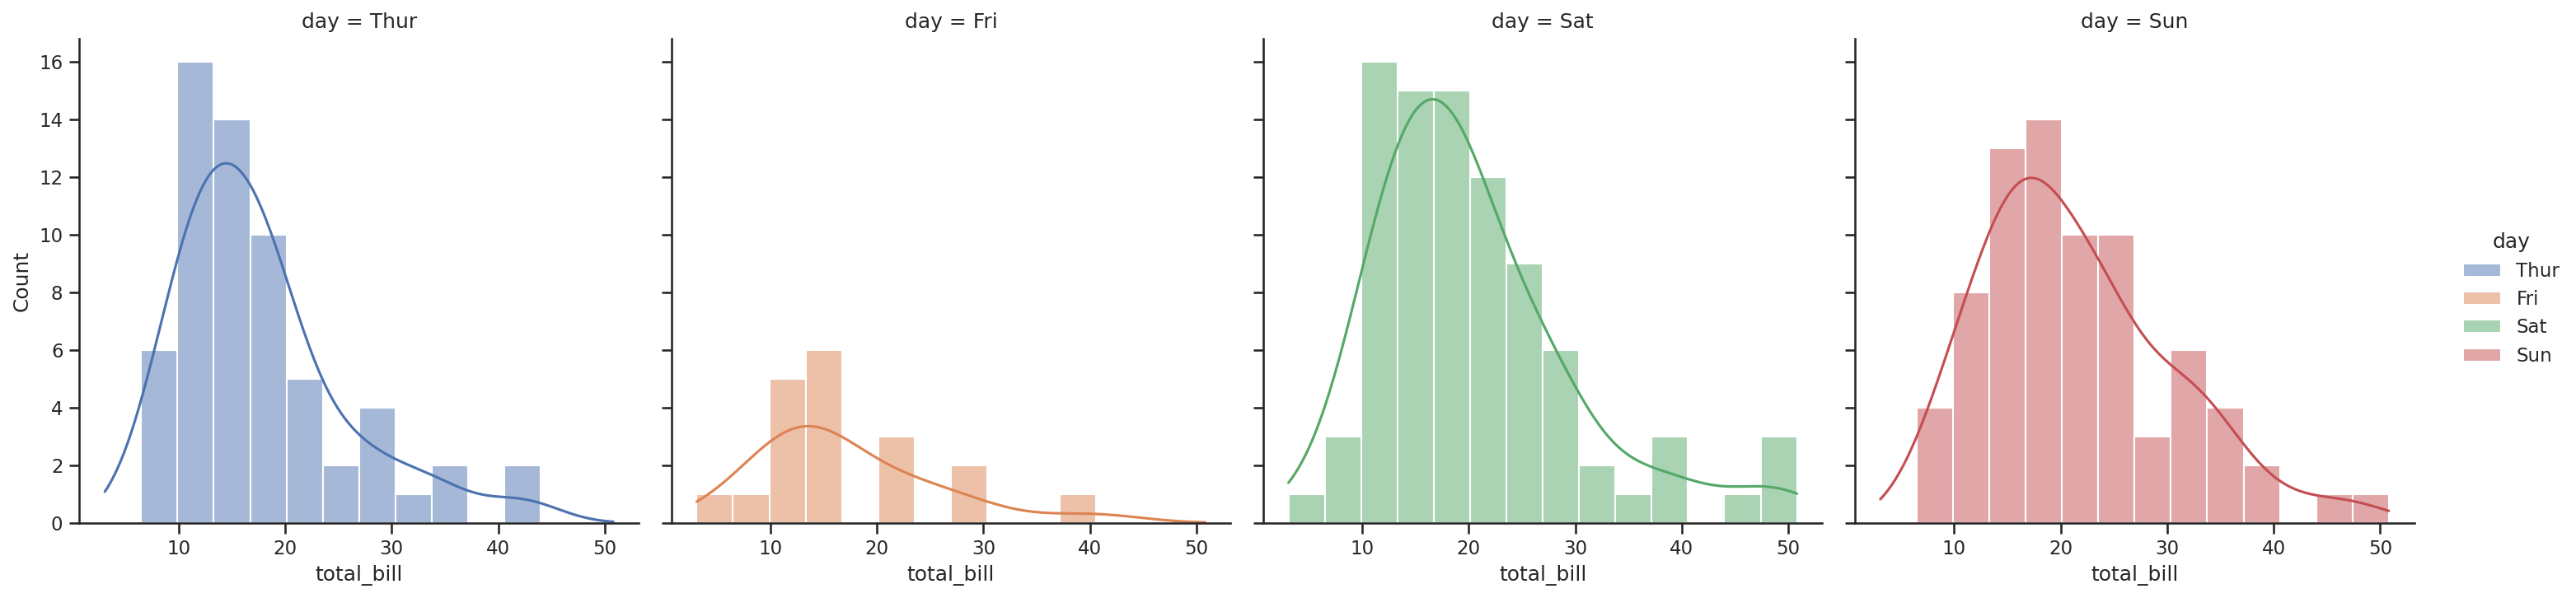

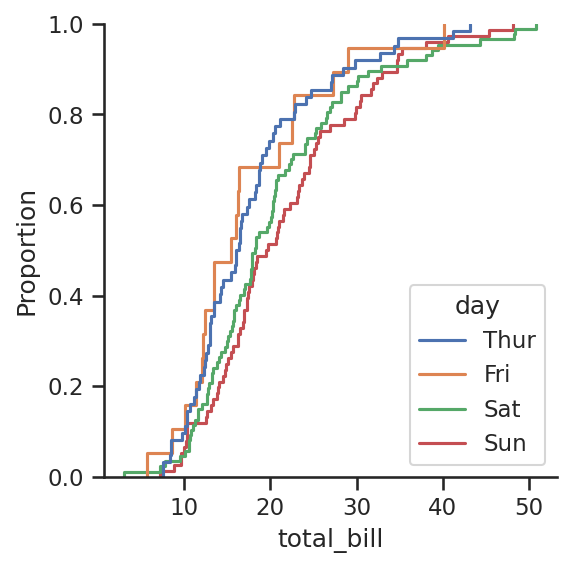

<Figure size 900x600 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import scipy.stats as stats



sns.set_theme(style="ticks")

tips = sns.load_dataset("tips")

# plt.rcParams['font.family'] = 'Comic Sans MS'
plt.rcParams['figure.dpi']= 150


plt.figure()
sns.histplot(data=tips, x="total_bill",color="k") # stat="percent"
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_aspect(1./ax.get_data_ratio())

sns.displot(data=tips, x="total_bill", hue="day",kde=True,col="day")


# %%
#plt.figure()
#sns.histplot(data=tips, x="total_bill", hue="day", multiple="stack") # stat="percent"
#ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.set_aspect(1./ax.get_data_ratio())
# ax.set_aspect('.08')


plt.figure()
sns.ecdfplot(data=tips, x="total_bill", hue="day", stat="proportion")
ax = plt.gca()
ax.set_aspect(1./ax.get_data_ratio())
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.figure()
test = tips.total_bill[tips.day=='Sat']
# test = tips.total_bill[tips.time=='Dinner']
# test = stats.zscore(test)
print(stats.kstest(test,'norm',alternative='two-sided'))

#%%
# print(stats.kstest(tips.total_bill[tips.day=='Sat'], 'uniform'))

# tt = stats.norm.rvs(size=1000)
# sns.histplot(tt)
# print(stats.kstest(tt, 'norm'))
# stats.normaltest(tt)


Text(0, 0.5, '')

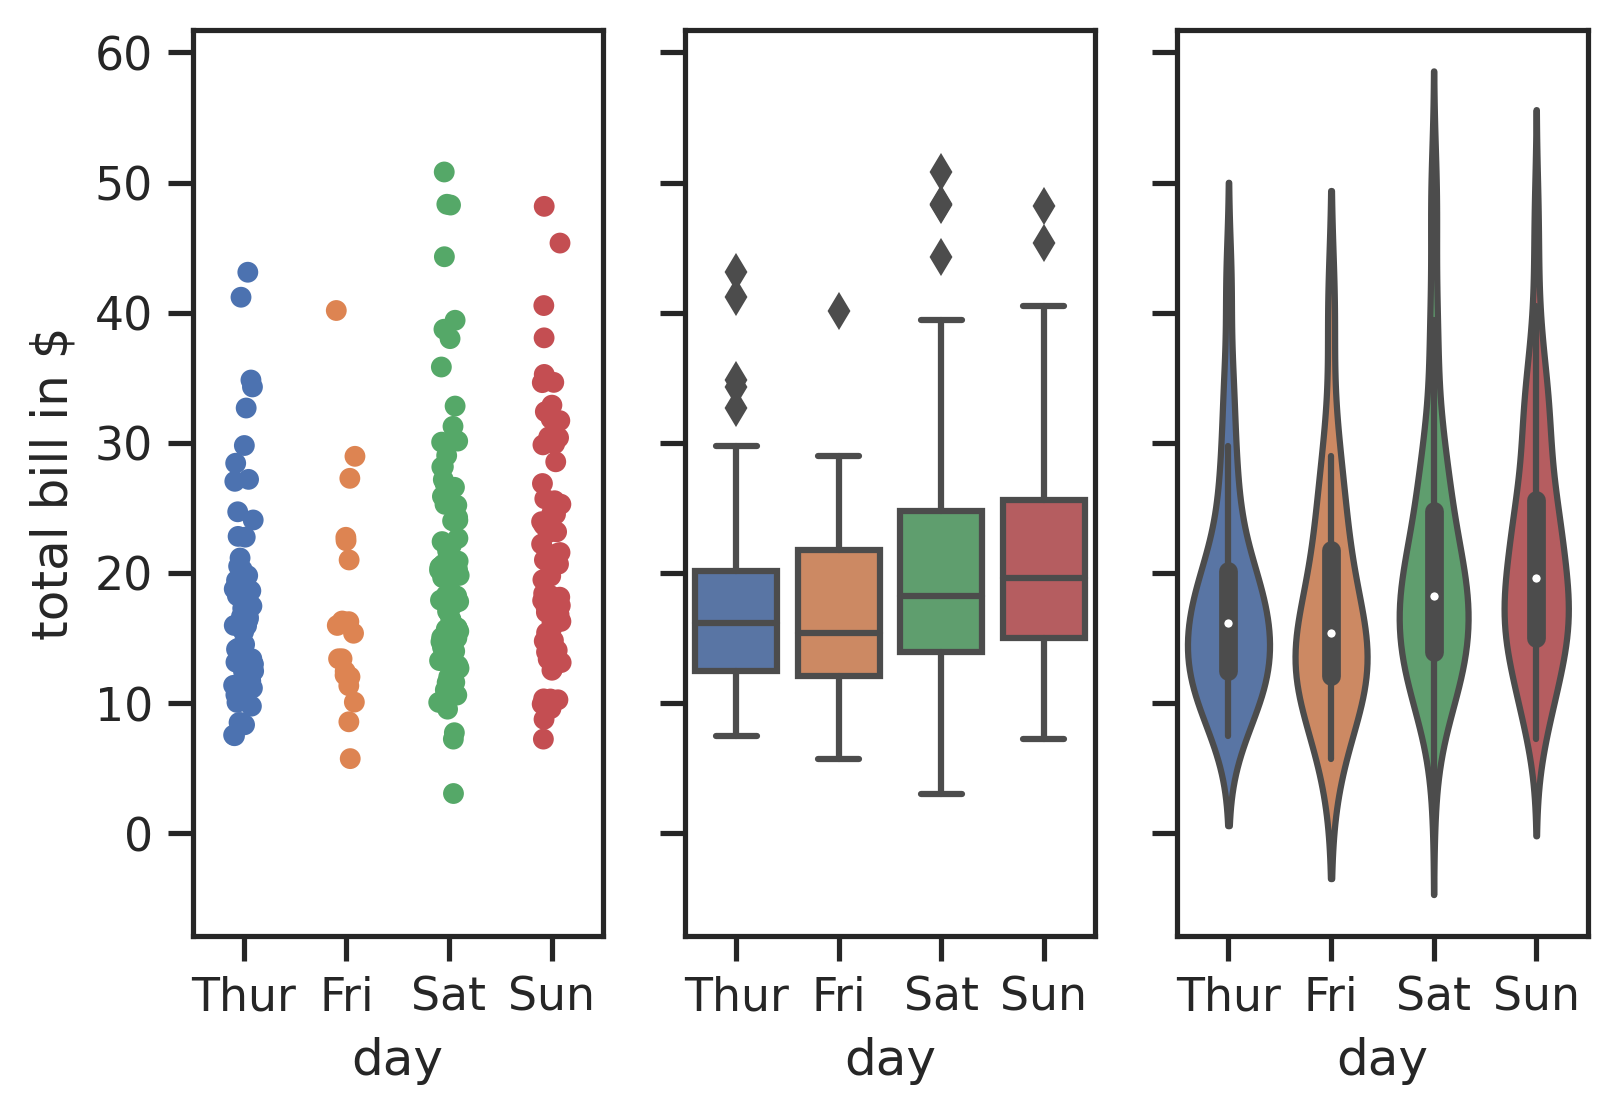

In [4]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: ju
"""
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'png'
plt.rcParams['figure.dpi']= 300
tips = sns.load_dataset("tips")
# plt.rcParams['font.family'] = 'Comic Sans MS'

fig, ax = plt.subplots(1, 3, sharex=True, sharey=True) 
# Scatter
sns.stripplot(x="day", y="total_bill", data=tips,ax=ax[0])
# ax[0].set_aspect('.08')

# Boxplot
sns.boxplot(x="day", y="total_bill", data=tips,ax=ax[1])

# Violinplot
sns.violinplot(x="day", y="total_bill", data=tips,ax=ax[2])# color=".9"

ax[0].set_ylabel('total bill in $')
ax[1].set_ylabel('')
ax[2].set_ylabel('')


p=0.003


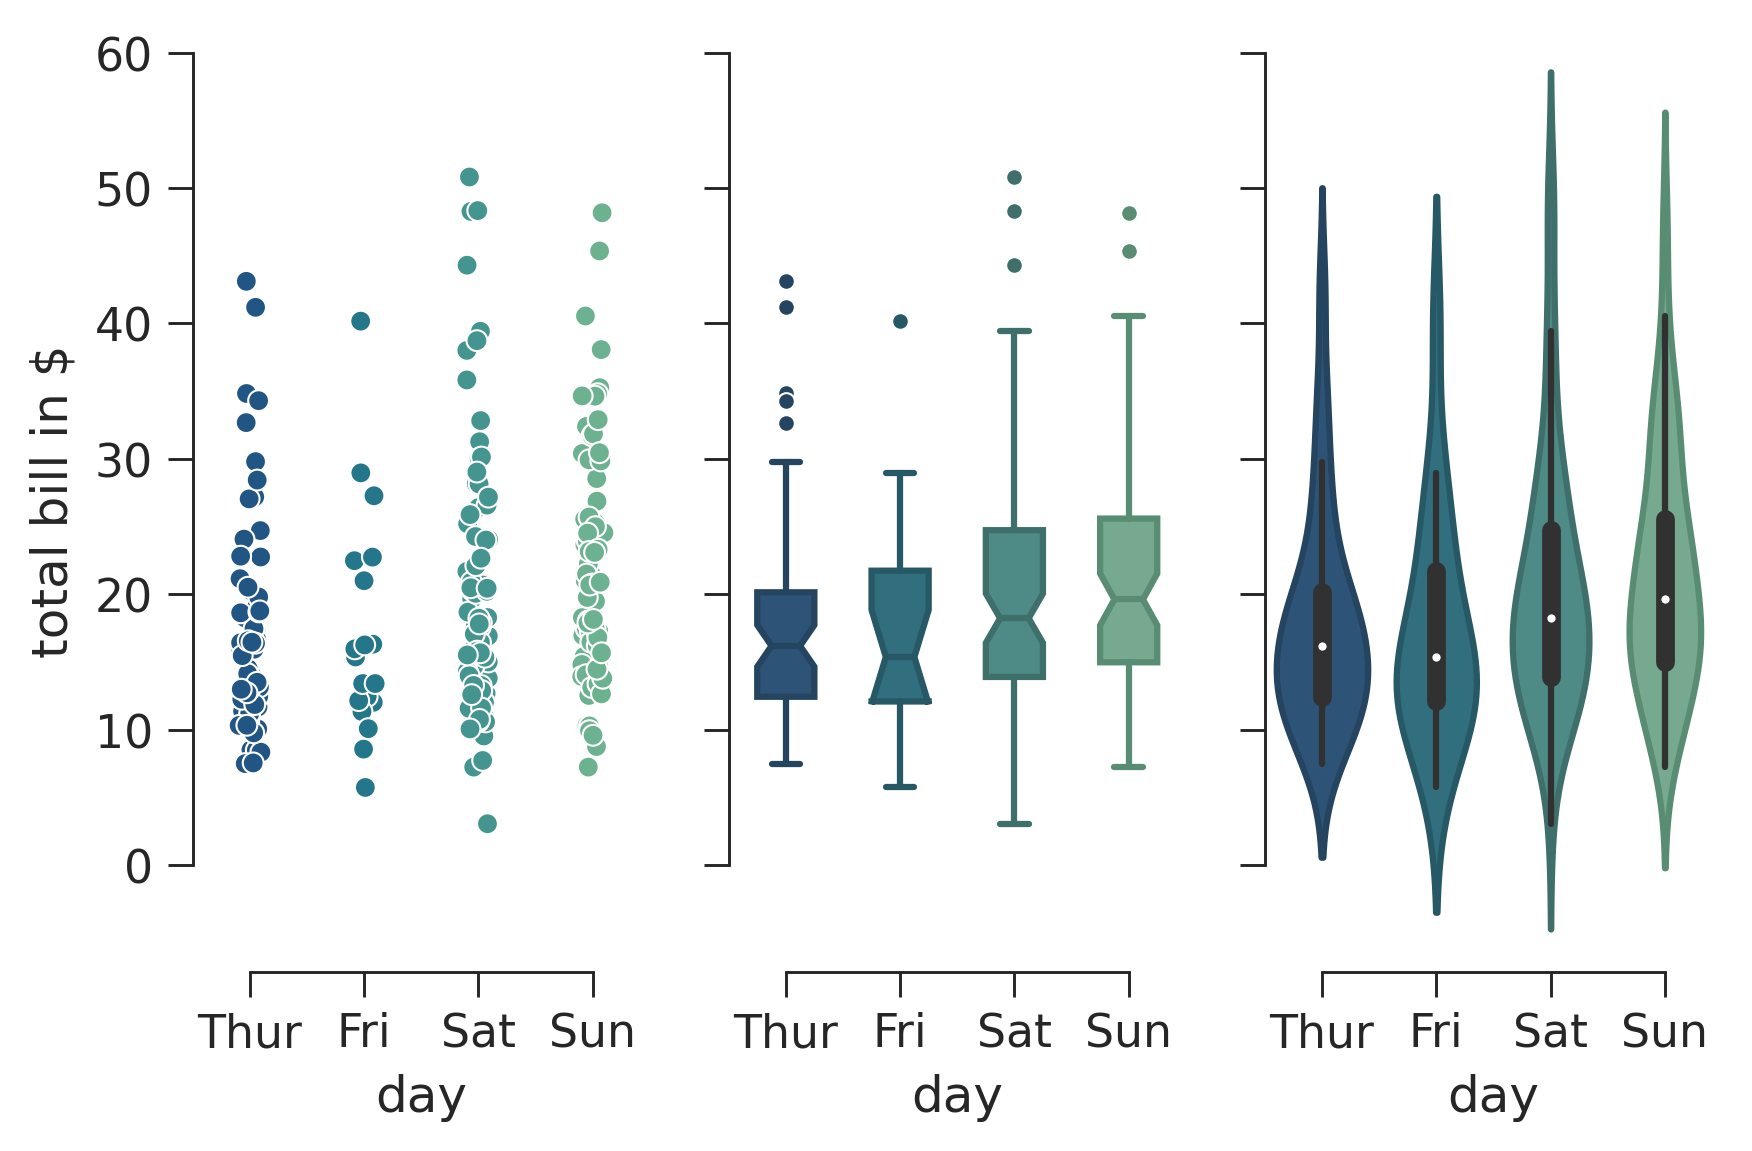

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: ju
"""
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

sns.set_theme(style="ticks")

tips = sns.load_dataset("tips")
# plt.rcParams['font.family'] = 'Comic Sans MS'
plt.rcParams['figure.dpi']= 300

def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])


fig, ax = plt.subplots(1, 3, sharex=True, sharey=True,figsize=(6, 4))
pal__=("cubehelix","Dark2","crest_r","vlag")
pal_=pal__[2]
y__=("total_bill","tip")
y_=y__[0]
x__=("day","time","size","sex","smoker")
x_=x__[0]

# Scatter
sns.stripplot(x=x_, y=y_, data=tips, palette=pal_,alpha=1,ax=ax[0], edgecolor='white',linewidth=0.5)
plt.tight_layout()
# ax[0].set_aspect('.08')

# Boxplot
sns.boxplot(x=x_, y=y_, data=tips, palette=pal_,ax=ax[1],notch=True,flierprops=dict(marker='o',markersize=4,markeredgecolor='white',markeredgewidth=.5),width=.5)
for i,artist in enumerate(ax[1].artists):
    col=artist.get_facecolor()
    col=adjust_lightness(col, amount=0.8)
    artist.set_edgecolor(col)    
    for j in range(i*6,i*6+6):
        line = ax[1].lines[j]
        line.set_color(col)
        line.set_mfc(col)
        # line.set_mec(col)
        line.set_linewidth(1.5)

# Violinplot
sns.violinplot(x=x_, y=y_, data=tips, palette=pal_,ax=ax[2])# color=".9"
for _,artist in enumerate(ax[2].collections[::2]):
    col=artist.get_facecolor()
    col=adjust_lightness(col, amount=0.8)
    artist.set_edgecolor(col)
sns.despine(trim=True);

#
ax[0].set_ylabel('total bill in $')
for _,artist in enumerate(ax[1:]):
    artist.set_ylabel('')
    
for _,artist in enumerate(ax):
    artist.tick_params(width=.7)    
    for _,s in artist.spines.items():
        s.set_linewidth(.7)

plt.tight_layout()        

# Wilcoxon-Mann-Whitney-Test
a_=np.array(tips.total_bill[tips.day=='Thur'])
b_=np.array(tips.total_bill[tips.day=='Sun'])
U1, p_ = stats.mannwhitneyu(a_, b_, alternative='less') # two-sided
print("p="+"{:.3f}".format(p_))


Text(0.5, 1.0, 'Always account for the variance!')

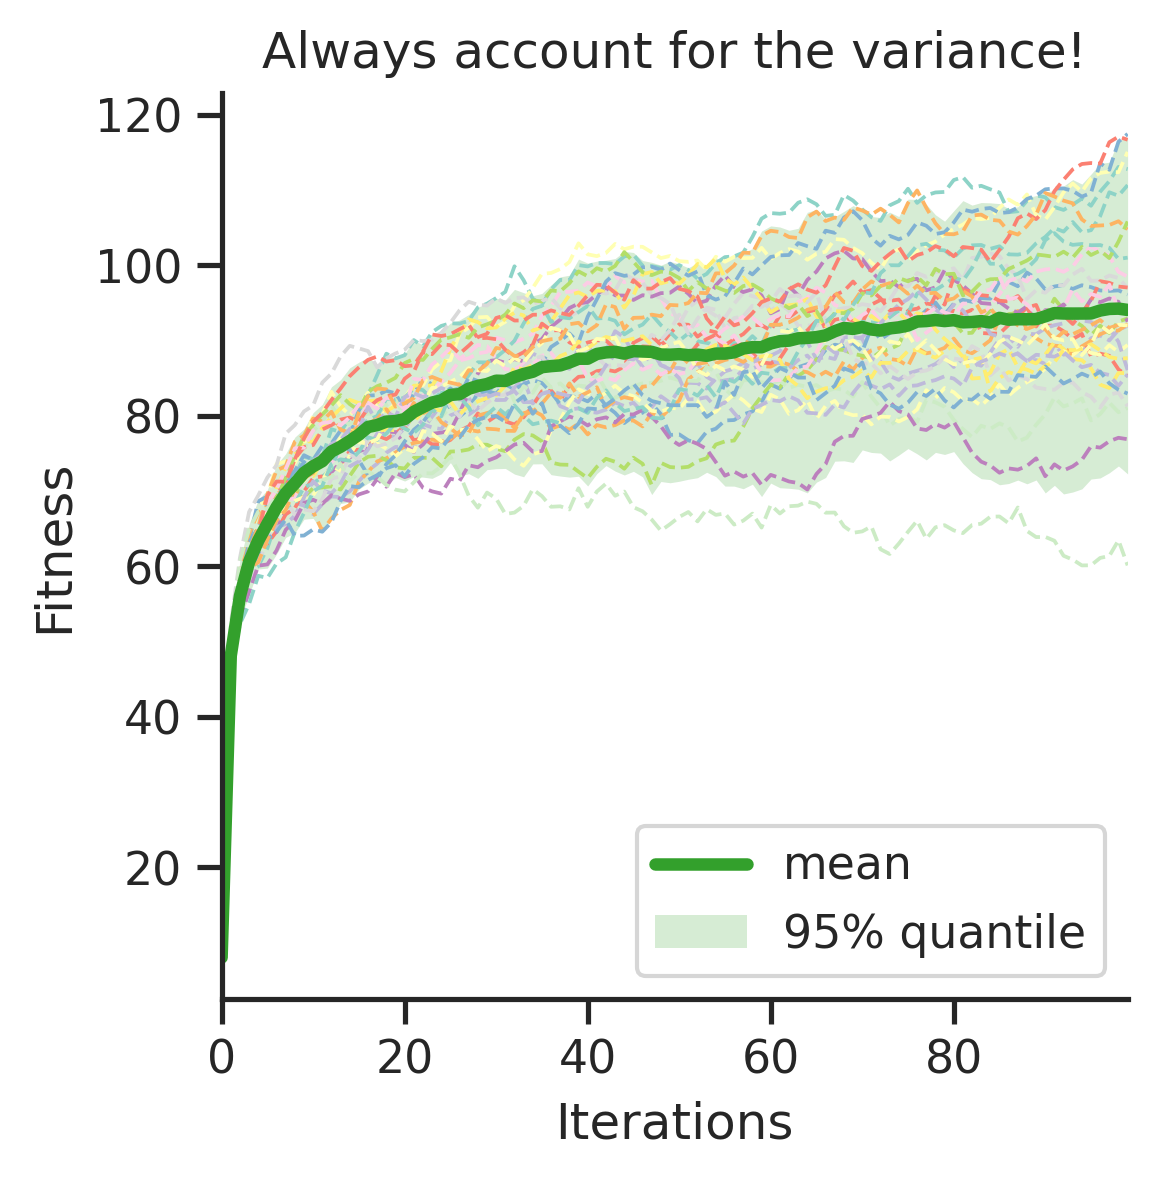

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

def random_timeseries(initial_value: float, volatility: float, count: int) -> list:
    time_series = [initial_value, ]
    for k in range(count):
        time_series.append(time_series[-1] + initial_value * random.gauss(0, 1) * volatility + 100/(4*k+1))
    return time_series


tr_=30
ts=np.full([tr_, 100], np.nan)
for ii in range(0,tr_):
    ts[ii,:] = random_timeseries(20, 0.15, 99)


ts=ts*.4
plt.figure()
plt.rcParams['figure.dpi']= 150
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set3.colors)
plt.plot(ts.transpose(),linewidth=.9,linestyle='--')


perc1 = np.percentile(ts,2.5,axis=0)
perc2 = np.percentile(ts,97.5,axis=0)

t_=np.linspace(0, 99,100)
mean_ = np.mean(ts,0)
a = plt.plot(mean_,linewidth=3,color='#33a02c',label="mean")
b = plt.fill_between(t_, perc1, perc2, color='#33a02c', alpha=0.2,label="95% quantile",linewidth=0.0)
plt.xlim(np.min(t_), np.max(t_)) 

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_aspect(1./ax.get_data_ratio())
plt.legend(loc='lower right')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Always account for the variance!')
# plt.savefig('test3.pdf',bbox_inches='tight') # transparent=True




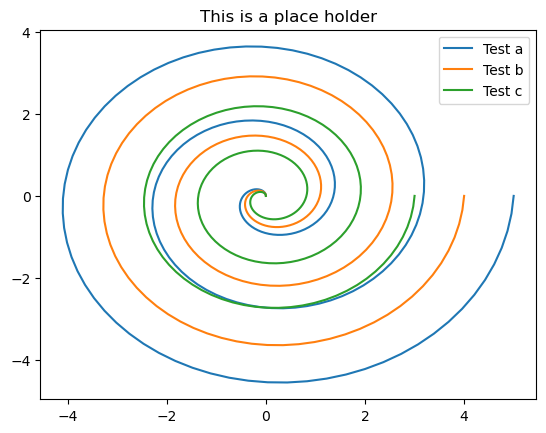

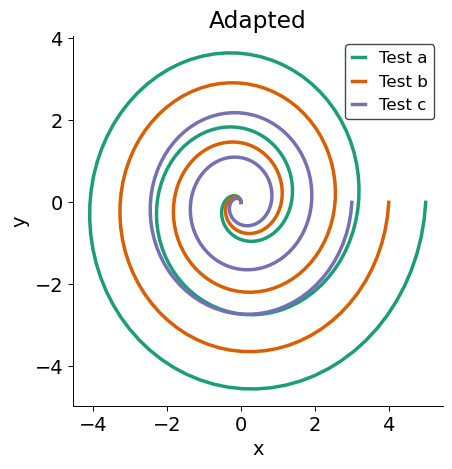

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


r = np.linspace(0, 1, 200)
r2 = np.linspace(0, 4, 200)
phi_ = np.linspace(0, -5.5*np.pi, 200)
x_ = np.sin(phi_)
y = np.cos(phi_)

plt.figure
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['figure.dpi']= 100
# plt.rcParams['font.family'] = 'Comic Sans MS'
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
# plt.rcParams.update({'font.size': 6})

plt.plot(5*r*x_,5*r*y, '-', label='Test a')
plt.plot(4*r*x_,4*r*y, '-', label='Test b') 
plt.plot(3*r*x_,3*r*y, '-', label='Test c')
plt.legend()
plt.title('This is a place holder')
plt.savefig('test1.pdf') # transparent=True

#%%
# plt.rcParams.update(plt.rcParamsDefault)
plt.figure()
plt.rc('font', size=14) 
# plt.rcParams.update({'font.size':19})
#plt.rcParams['font.family'] = 'Helvetica Neue'
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors) # Set2
plt.plot(5*r*x_,5*r*y, '-', label='Test a', markersize=4,linewidth=2.5)
plt.plot(4*r*x_,4*r*y, '-', label='Test b',linewidth=2.5)
plt.plot(3*r*x_,3*r*y, '-', label='Test c', markersize=4,linewidth=2.5)
plt.xlabel('x')
plt.ylabel('y')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_aspect(1./ax.get_data_ratio())
plt.title('Adapted')
leg = plt.legend(handlelength=.8,prop={'size': 12})
leg.get_frame().set_edgecolor('k')
# sns.despine(offset=10, trim=True);

ax.tick_params(width=0.7)    
for _,s in ax.spines.items():
    s.set_linewidth(0.7)

# plt.savefig('test2.pdf',bbox_inches='tight') # transparent=True
